In [47]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('presentation') # copy simlink from this folder
%matplotlib notebook
colors = [item['color'] for item in colors]


In [2]:
cycles_dod = np.genfromtxt ('ieee_std_1679_cycle_life.dat', delimiter=",")
dod    = cycles_dod[:,0]
cycles = cycles_dod[:,1]


<img src='ieee_std_1679_cycle_life.png' width=600>

In [8]:
from scipy.optimize import curve_fit

def func_exp(x, a,b,c):

    return a * np.exp(-b * x) + c

def func_pow(x, a,b):

    return  a*x**b

from scipy.interpolate import UnivariateSpline

spl_cycles_dod = UnivariateSpline(dod, cycles, s=1.0)

coef_exp, pcov = curve_fit(func_exp,dod,cycles)
coef_pow, pcov = curve_fit(func_pow,cycles,dod)

print('coef_exp: ',coef_exp)
print('coef_pow: ',coef_pow)

coef_exp:  [  1.93547231e+06   2.35166406e-01   1.31256145e+04]
coef_pow:  [  3.71002724e+03  -4.84307483e-01]


/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in exp
/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in multiply


In [9]:
func_pow(80, 3.71002724e+03,  -4.84307483e-01)

444.3205262779029

<IPython.core.display.Javascript object>


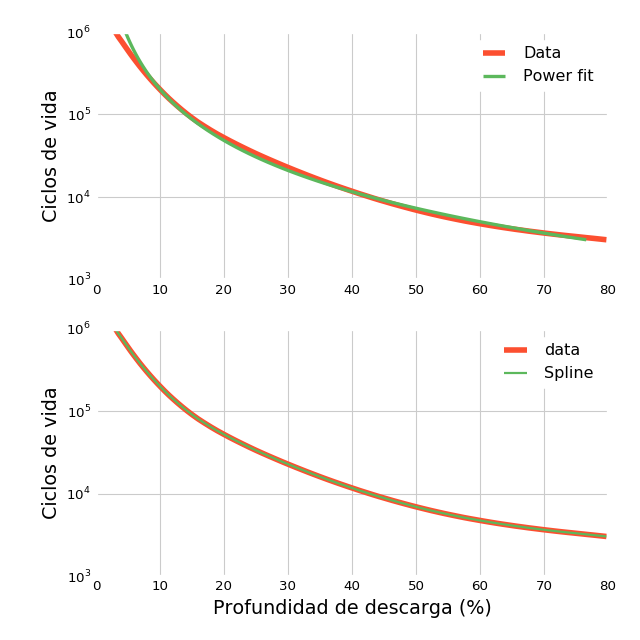

a 3710.02723629
b -0.484307483189


In [13]:
fig_cycles_dod, (ax0,ax1) = plt.subplots(nrows=2, figsize=(8,8))    
width = 0.05

ax0.semilogy(dod,cycles, lw=5, label='Data' )
a,b,c = coef_exp
#ax0.semilogy(dod,func_exp(dod,a,b,c  ), 'g',lw=2)
a,b = coef_pow
ax0.semilogy(func_pow(cycles,a,b ),cycles, lw=3, label='Power fit' )

ax1.semilogy(dod,cycles, lw=5, label='data')
ax1.semilogy(dod,spl_cycles_dod(dod), lw=2, label='Spline')

ax0.legend()
ax1.legend()
ax0.grid(True)
ax1.grid(True)
ax1.set_xlabel('DOD (%)')

ax0.set_title('Cycles')
ax1.set_title('Cycles')

print('a', a)
print('b', b)


In [15]:
ax1.set_xlabel('Profundidad de descarga (%)')
ax0.set_title('')
ax1.set_title('')
ax0.set_ylabel('Ciclos de vida')
ax1.set_ylabel('Ciclos de vida')
fig_cycles_dod.savefig('ciclos_dod.pdf', bbox_inches='tight')

In [ ]:
fig, (ax0) = plt.subplots(nrows=1, figsize=(8,6))    

cell_capacity = 3.0 # MWh
mwh_throughtput = 2.0*dod/100.0*cell_capacity*spl_cycles_dod(dod)

ax0.plot(dod,mwh_throughtput/1000, 'r')

ax0.grid(True)

ax0.set_xlabel('DOD')
ax0.set_title("GWh-throughput (GWh)")



In [18]:
fig.set_figsize=(6,4)
ax0.set_xlabel('Profundidad de descarga (%)')
ax0.set_ylabel('Energía intercambiada (GWh)')
ax0.set_title('')

fig.savefig('mwh_dod.png', bbox_inches='tight')


In [19]:
time_soc = np.genfromtxt ('soc_profile.dat', delimiter=",")
t_original    = time_soc[:,0]
soc_original = time_soc[:,1]

t = np.arange(0.0,60*60*24,1.0)
soc = np.interp(t,t_original,soc_original)



In [21]:
from rdp import rdp
from time import time

t_ini = time()
t_soc =rdp(np.vstack((t,soc)).T,  epsilon=0.02)
print(time()-t_ini)
t_red = t_soc[:,0]
soc_red = t_soc[:,1]
print(t_soc.shape)

t_ini = time()
t_soc_2 =rdp(np.vstack((t,soc)).T,  epsilon=0.1)
print(time()-t_ini)
t_red_2 = t_soc_2[:,0]
soc_red_2 = t_soc_2[:,1]
print(t_soc_2.shape)


spl_soc = UnivariateSpline(t,soc, s=0.1)


60.867563009262085
(827, 2)
42.39367175102234
(68, 2)


<IPython.core.display.Javascript object>


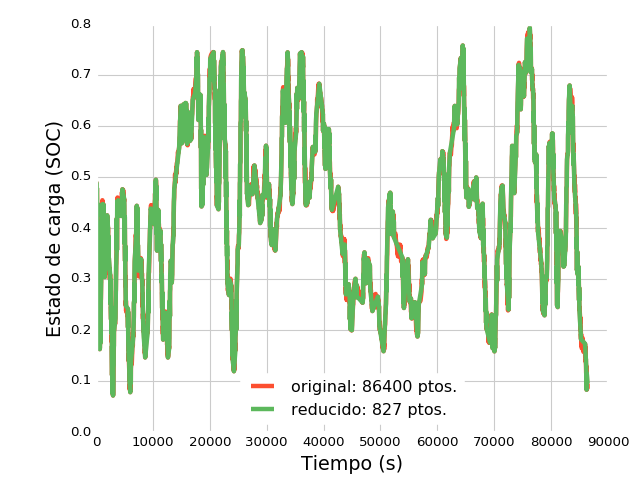

In [26]:
fig_soc, (ax_soc) = plt.subplots(nrows=1, figsize=(8,6))   

ax_soc.plot(t,soc, label='original: {:d} ptos.'.format(t.shape[0]))
ax_soc.plot(t_red,soc_red,  label='reducido: {:d} ptos.'.format(t_soc.shape[0]))
#ax_soc.plot(t,spl_soc(t), 'g',lw=2, label='spline')
ax_soc.grid(True)
ax_soc.legend(loc='best')
ax_soc.set_xlabel('Time (s)')
ax_soc.set_ylabel("SOC (pu)")


In [27]:
ax_soc.set_xlabel('Tiempo (s)')
ax_soc.set_title('')
ax_soc.set_ylabel('Estado de carga (SOC)')

fig_soc.savefig('soc.svg', bbox_inches='tight')
fig_soc.savefig('soc.pdf', bbox_inches='tight')
fig_soc.savefig('soc.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


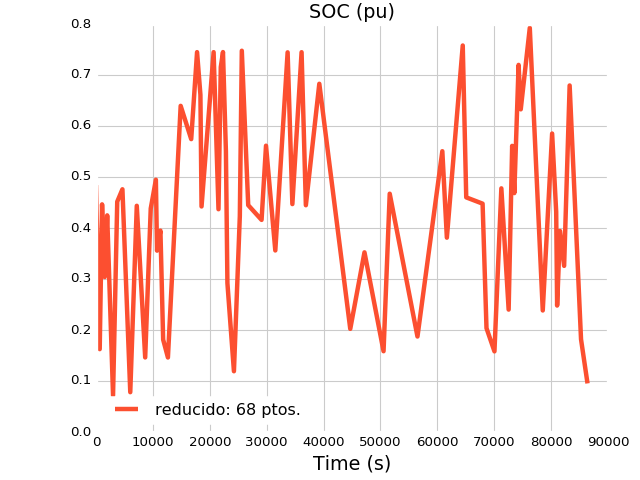

In [30]:
fig_soc_2, (ax_soc_2) = plt.subplots(nrows=1, figsize=(8,6))   

#ax_soc_2.plot(t,soc, color=colors['red'],lw=2, label='original: {:d} ptos.'.format(t.shape[0]))
ax_soc_2.plot(t_red_2,soc_red_2,  label='reducido: {:d} ptos.'.format(t_red_2.shape[0]))
#ax_soc.plot(t,spl_soc(t), 'g',lw=2, label='spline')
ax_soc_2.grid(True)
ax_soc_2.legend(loc='best')
ax_soc_2.set_xlabel('Time (s)')
ax_soc_2.set_title("SOC (pu)")


0.032208919525146484
0.010882139205932617


<IPython.core.display.Javascript object>


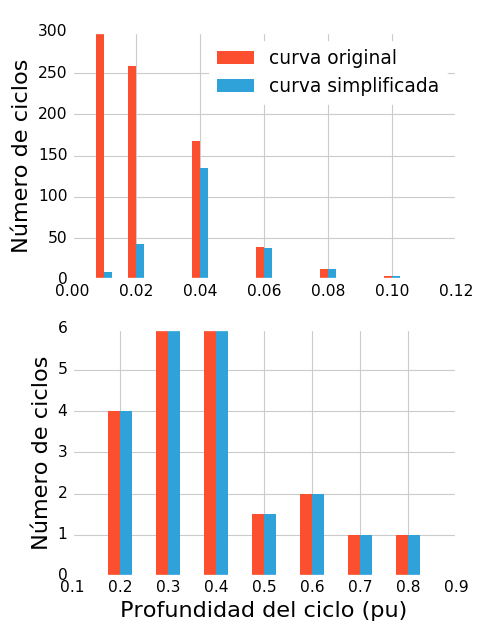

<IPython.core.display.Javascript object>


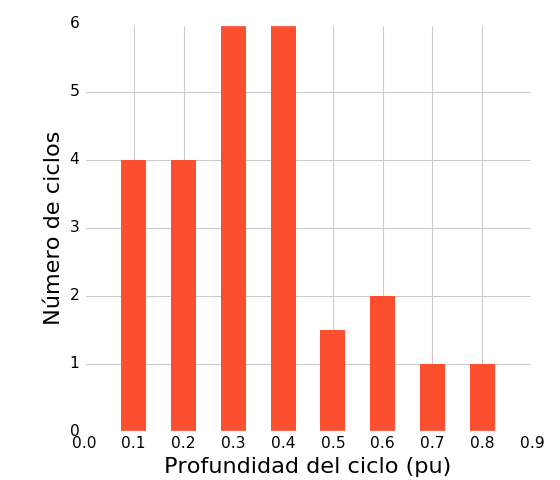

[ 6.  8.]


In [57]:
import sys, os

sys.path.append(os.path.join('..','pybess'))
from rain_flow import rainflow
rList = np.array([ 0.01, 0.02, 0.04, 0.06, 0.08,
                  0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
#rList = np.arange(0.0,1.0,0.05)
t_ini = time()
res     = rainflow(soc,rList)
print(time()-t_ini)

t_ini = time()
res_red = rainflow(soc_red,rList)
print(time()-t_ini)

#t_ini = time()
#res_red = rainflow(spl_soc(t),rList)
#print(time()-t_ini)




fig_hist, (ax_low,ax_high) = plt.subplots(nrows=2, figsize=(6,8))   
fig_hist_simple, (ax_hist) = plt.subplots(nrows=1, figsize=(7,6))  
width = 0.0025
bar_original = ax_low.bar(res[:6,0]-2.0*width/2.0,res[:6,1],width=width, lw=0, color=colors[0])
bar_simple =ax_low.bar(res_red[:6,0]+0.0*width/2.0,res_red[:6,1],width=width, lw=0, color=colors[2])

ax_low.legend((bar_original[0],bar_simple[0]), ('curva original', 'curva simplificada'))

width = 0.025
ax_high.bar(res[6:,0]-2.0*width/2.0,res[6:,1],width=width, lw=0, color=colors[0])
ax_high.bar(res_red[6:,0]+0.0*width/2.0,res_red[6:,1],width=width, lw=0, color=colors[2])
ax_low.grid(True)
ax_high.grid(True)

#ax_low.set_xlabel('Profundidad del ciclo (pu)')
ax_high.set_xlabel('Profundidad del ciclo (pu)')
ax_soc.set_title('')
ax_low.set_ylabel('Número de ciclos')
ax_high.set_ylabel('Número de ciclos')

fig_hist.savefig('histograms_high_low.svg', bbox_inches='tight')


width = 0.05
ax_hist.bar(res_red[5:,0]-width/2.0,res_red[5:,1],width=width, lw=0, color=colors[0])



print(fig_hist.get_size_inches())

fig_hist_simple.savefig('histograms_simple.svg', bbox_inches='tight')

ax_hist.set_xlabel('Profundidad del ciclo (pu)')
ax_hist.set_ylabel('Número de ciclos')







[ 6.  8.]


In [38]:
amp_filter_threshold = 0.001
amplitudes = res[:,0]
cycles = res[:,1]

idx = np.argmax(amplitudes>=amp_filter_threshold)

print(amplitudes[idx:])
life_consumed = cycles[idx:]/spl_cycles_dod(amplitudes[idx:]*100.0)
total_life_consumed = np.sum(life_consumed)

days = 1.0/total_life_consumed

days/365.0

days

[ 0.01  0.02  0.04  0.06  0.08  0.1   0.2   0.3   0.4   0.5   0.6   0.7
  0.8 ]


363.50464697323815

In [39]:
life_consumed

a = np.vstack((amplitudes[idx:].T,cycles[idx:].T,spl_cycles_dod(100*amplitudes[idx:]).T,life_consumed.T*1e3)).T
print(" \\\\\n".join([" & ".join(map('{0:.4g}'.format, line)) for line in a]))

0.01 & 300 & 2.57e+06 & 0.1167 \\
0.02 & 259 & 1.516e+06 & 0.1708 \\
0.04 & 168 & 7.706e+05 & 0.218 \\
0.06 & 39 & 4.664e+05 & 0.08361 \\
0.08 & 12 & 2.976e+05 & 0.04032 \\
0.1 & 4 & 2.006e+05 & 0.01994 \\
0.2 & 4 & 5.223e+04 & 0.07659 \\
0.3 & 6 & 2.275e+04 & 0.2637 \\
0.4 & 6 & 1.17e+04 & 0.5127 \\
0.5 & 1.5 & 6908 & 0.2172 \\
0.6 & 2 & 4721 & 0.4237 \\
0.7 & 1 & 3640 & 0.2747 \\
0.8 & 1 & 3003 & 0.333


In [58]:
print('&   &    &    {:2.1f}'.format(1000*total_life_consumed))
print('&   & Expectativa:   &    {:2.1f} días'.format(1.0/total_life_consumed))

&   &    &    2.8
&   & Expectativa:   &    363.5 días


In [59]:
amp_filter_threshold = 0.001
amplitudes = res_red[:,0]
cycles = res_red[:,1]

idx = np.argmax(amplitudes>=amp_filter_threshold)

print(amplitudes[idx:])
life_consumed = cycles[idx:]/spl_cycles_dod(amplitudes[idx:]*100.0)
total_life_consumed = np.sum(life_consumed)

days = 1.0/total_life_consumed

days/365.0

days

life_consumed

a = np.vstack((amplitudes[idx:].T,cycles[idx:].T,spl_cycles_dod(100*amplitudes[idx:]).T,life_consumed.T*1e3)).T
print(" \\\\\n".join([" & ".join(map('{0:.4g}'.format, line)) for line in a]))

print('&   &    &    {:2.1f}'.format(1000*total_life_consumed))
print('&   & Expectativa:   &    {:2.1f} días'.format(1.0/total_life_consumed))

[ 0.01  0.02  0.04  0.06  0.08  0.1   0.2   0.3   0.4   0.5   0.6   0.7
  0.8 ]
0.01 & 9 & 2.57e+06 & 0.003502 \\
0.02 & 43 & 1.516e+06 & 0.02836 \\
0.04 & 135.5 & 7.706e+05 & 0.1758 \\
0.06 & 38 & 4.664e+05 & 0.08147 \\
0.08 & 12 & 2.976e+05 & 0.04032 \\
0.1 & 4 & 2.006e+05 & 0.01994 \\
0.2 & 4 & 5.223e+04 & 0.07659 \\
0.3 & 6 & 2.275e+04 & 0.2637 \\
0.4 & 6 & 1.17e+04 & 0.5127 \\
0.5 & 1.5 & 6908 & 0.2172 \\
0.6 & 2 & 4721 & 0.4237 \\
0.7 & 1 & 3640 & 0.2747 \\
0.8 & 1 & 3003 & 0.333
&   &    &    2.5
&   & Expectativa:   &    408.0 días


<IPython.core.display.Javascript object>


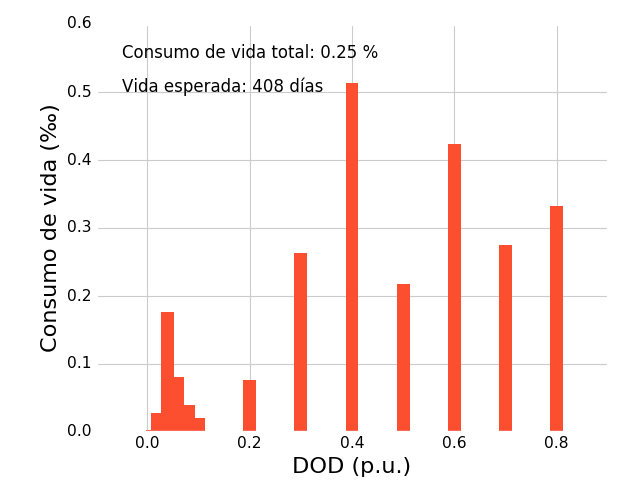

In [70]:
fig_hist_times, (ax_times) = plt.subplots(nrows=1, figsize=(8,6))   
 
width = 0.025
ax_times.bar(amplitudes[idx:]-1.0*width/2.0,life_consumed*1000.0,width=width, lw=0, color=colors[0])
ax_times.set_xlabel('DOD (p.u.)')
ax_times.set_title('')
ax_times.set_ylabel(u'Consumo de vida (‰)')
ax_times.text(-0.05,0.55,'Consumo de vida total: {:2.2f} %'.format(total_life_consumed*100),fontsize=15)
ax_times.text(-0.05,0.5,'Vida esperada: {:2.0f} días'.format(1.0/total_life_consumed),fontsize=15)

fig_hist_times.savefig('hist_times.svg', bbox_inches='tight')

<img src='anr26650m1b.png' width=800>

ah_throughtput_n 47497.0423909


<IPython.core.display.Javascript object>


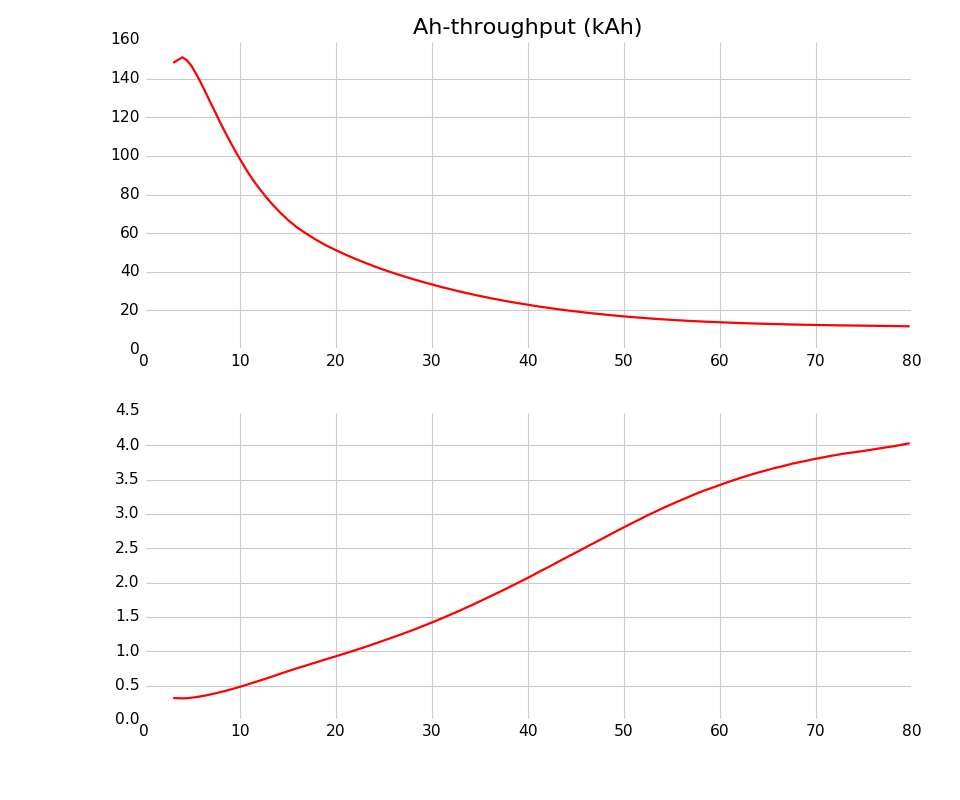

In [69]:
spl_cycles_dod(dod)*dod

cell_capacity = 2.45 # Ah
ah_throughtput_n = 2.0*cell_capacity*spl_cycles_dod(100)
ah_throughtput = 2.0*cell_capacity*dod/100.0*spl_cycles_dod(dod)
print('ah_throughtput_n', ah_throughtput_n)
fig, (ax0,ax1) = plt.subplots(nrows=2, figsize=(12,10))    
width = 0.05
#ax0.plot(t,soc, lw=2)
ax0.plot(dod,ah_throughtput/1.0e3, 'r', lw=2)
ax1.plot(dod,ah_throughtput_n/ah_throughtput, 'r', lw=2)
ax0.grid(True)
ax1.grid(True)

ax0.set_title("Ah-throughput (kAh)")


## Is the capacity loss caused by resistance variation?


In [23]:
R_ini = 12e-3
I_charge = 2.5
P_loss = R_ini*I_charge
E_loss = P_loss*3600.0
E = I_charge*3.3*3600
print(P_loss)
print('E_loss = ',E_loss)
print('E = ',E)

0.03
E_loss =  108.0
E =  29700.0


## Examples


### Comparative battery with 1 MAh vs 2 MAh duravility

Considering one cycle per day of 0.8 MAh

In [71]:
E_bat_1 = 1.0e6*3600  #J
E_bat_2 = 2.0e6*3600  #J
E_bat_3 = 3.0e6*3600  #J
E_bat_4 = 4.0e6*3600  #J

In [72]:
E_cycle_charging = 0.8e6*3600 #J

In [73]:
DOD_1 = E_cycle_charging/E_bat_1*100
DOD_2 = E_cycle_charging/E_bat_2*100
DOD_3 = E_cycle_charging/E_bat_3*100
DOD_4 = E_cycle_charging/E_bat_4*100

Life_spected_1 = spl_cycles_dod(DOD_1) 
Life_spected_2 = spl_cycles_dod(DOD_2) 
Life_spected_3 = spl_cycles_dod(DOD_3) 
Life_spected_4 = spl_cycles_dod(DOD_4) 

Life_spected_1_y = Life_spected_1/365
Life_spected_2_y = Life_spected_2/365
Life_spected_3_y = Life_spected_3/365
Life_spected_4_y = Life_spected_4/365

print('Life_spected_1_y: {:2.1f} years'.format(Life_spected_1_y))
print('Life_spected_2_y: {:2.1f} years'.format(Life_spected_2_y))
print('Life_spected_3_y: {:2.1f} years'.format(Life_spected_3_y))
print('Life_spected_4_y: {:2.1f} years'.format(Life_spected_4_y))



Life_spected_1_y: 8.2 years
Life_spected_2_y: 32.1 years
Life_spected_3_y: 80.3 years
Life_spected_4_y: 143.1 years


In [74]:
Life_spected_4

array(52225.53443885445)

In [75]:
Life_spected_2

array(11702.146339783)

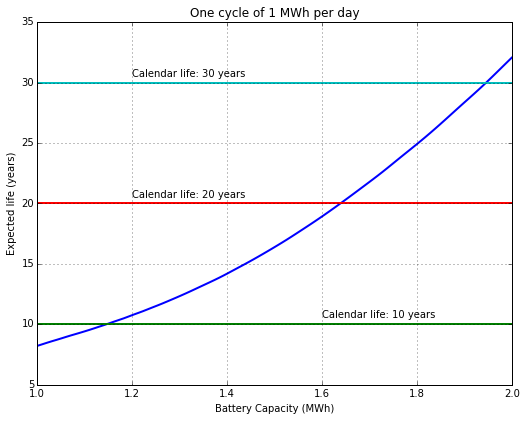

In [29]:
E_bat_capacity = np.linspace(1.0,2.0,100)*1.0e6*3600
DOD =  E_cycle_charging/E_bat_capacity*100
Life_spected = spl_cycles_dod(DOD) 
Life_spected_y = Life_spected/365
fig, (ax0) = plt.subplots(nrows=1, figsize=(8.5,6.5))    
width = 0.05
#ax0.plot(t,soc, lw=2)
E_bat_capacity_mwh = E_bat_capacity/1.0e6/3600
ax0.plot(E_bat_capacity_mwh,Life_spected_y, lw=2)
ax0.plot([E_bat_capacity_mwh[0],E_bat_capacity_mwh[-1]], [10,10], lw=2)
ax0.plot([E_bat_capacity_mwh[0],E_bat_capacity_mwh[-1]], [20,20], lw=2)
ax0.plot([E_bat_capacity_mwh[0],E_bat_capacity_mwh[-1]], [30,30], lw=2)
ax0.set_xlabel('Battery Capacity (MWh)')

ax0.text(1.6, 10.5, r'Calendar life: 10 years', fontsize=10)
ax0.text(1.2, 20.5, r'Calendar life: 20 years', fontsize=10)
ax0.text(1.2, 30.5, r'Calendar life: 30 years', fontsize=10)


ax0.set_title('One cycle of 1 MWh per day')
ax0.set_xlim((E_bat_capacity_mwh[0],E_bat_capacity_mwh[-1]))
ax0.set_ylabel(u'Expected life (years)')
ax0.grid(True)



In [30]:
ax0.set_title('Un ciclo diario de 1 MWh')
fig.set_size_inches(7,5)
#ax0.set_xlim((E_bat_capacity_mwh[0],E_bat_capacity_mwh[-1]))
ax0.set_ylabel(u'Vida estimada (años)')
ax0.set_xlabel(u'Capacidad de la bateria (MWh)')
ax0.grid(True)
fig.savefig('../../../doc/src/png/capacidad_vida.png', bbox_inches='tight')

In [31]:
DOD

array([ 80.        ,  79.2       ,  78.41584158,  77.64705882,
        76.89320388,  76.15384615,  75.42857143,  74.71698113,
        74.01869159,  73.33333333,  72.66055046,  72.        ,
        71.35135135,  70.71428571,  70.08849558,  69.47368421,
        68.86956522,  68.27586207,  67.69230769,  67.11864407,
        66.55462185,  66.        ,  65.45454545,  64.91803279,
        64.3902439 ,  63.87096774,  63.36      ,  62.85714286,
        62.36220472,  61.875     ,  61.39534884,  60.92307692,
        60.45801527,  60.        ,  59.54887218,  59.10447761,
        58.66666667,  58.23529412,  57.81021898,  57.39130435,
        56.97841727,  56.57142857,  56.17021277,  55.77464789,
        55.38461538,  55.        ,  54.62068966,  54.24657534,
        53.87755102,  53.51351351,  53.15436242,  52.8       ,
        52.45033113,  52.10526316,  51.76470588,  51.42857143,
        51.09677419,  50.76923077,  50.44585987,  50.12658228,
        49.81132075,  49.5       ,  49.19254658,  48.88

In [32]:
Life_spected_y

array([  8.22642521,   8.35184114,   8.47926688,   8.6022771 ,
         8.71981737,   8.84121109,   8.96538084,   9.08644159,
         9.20169975,   9.31852643,   9.43949953,   9.56280912,
         9.69191178,   9.82453024,   9.95456699,  10.08834864,
        10.22776805,  10.36229224,  10.49718411,  10.64537942,
        10.79622735,  10.93907227,  11.08565298,  11.24246633,
        11.39993874,  11.5546916 ,  11.71373774,  11.87951263,
        12.04818432,  12.21807684,  12.39067386,  12.56721977,
        12.74829444,  12.93338347,  13.11941047,  13.30391527,
        13.48876188,  13.67698179,  13.87104219,  14.07295013,
        14.28260068,  14.49574022,  14.70837632,  14.92101612,
        15.13634351,  15.35610257,  15.58010727,  15.80791384,
        16.03910577,  16.27329224,  16.51023229,  16.75079781,
        16.99635288,  17.24777683,  17.50371301,  17.76213053,
        18.02154441,  18.28274798,  18.54720477,  18.81612733,
        19.08960496,  19.3672485 ,  19.64868736,  19.93

## Aging caused by frequency support

In [33]:
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


### Data from SANDIA 

In [34]:
df_day = pd.read_hdf('duty.hdf5', 'duty')


In [35]:
df_day

,0,1
0,1900-01-01 00:00:00,-0.144251
3,1900-01-01 00:00:04,-0.129648
6,1900-01-01 00:00:08,-0.136014
9,1900-01-01 00:00:12,-0.142379
12,1900-01-01 00:00:16,-0.148744
15,1900-01-01 00:00:20,-0.155109
18,1900-01-01 00:00:24,-0.161475
21,1900-01-01 00:00:28,-0.150013
24,1900-01-01 00:00:32,-0.138552
27,1900-01-01 00:00:36,-0.113526


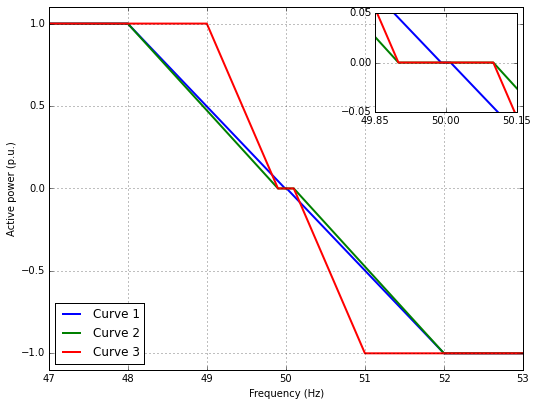

In [36]:

db_1 = 0.01 # Hz
freq_in_1 = np.array([40.0,48.0,50.0-db_1,50.0+db_1,52.0,60])
p_f_1     = np.array([ 1.0, 1.0,0.0,0.0,-1.0,-1.0])

db_2 = 0.1 # Hz
freq_in_2 = np.array([40.0,48.0,50.0-db_2,50.0+db_2,52.0,60])
p_f_2     = np.array([ 1.0, 1.0,0.0,0.0,-1.0,-1.0])


db_3 = 0.01 # Hz
freq_in_3 = np.array([40.0,49.0,50.0-db_2,50.0+db_2,51.0,60])
p_f_3    = np.array([ 1.0, 1.0,0.0,0.0,-1.0,-1.0])

fig, (ax0) = plt.subplots(nrows=1, figsize=(8.5,6.5))    

ax0.plot(freq_in_1,p_f_1, lw=2, label='Curve 1')
ax0.plot(freq_in_2,p_f_2, lw=2, label='Curve 2')
ax0.plot(freq_in_3,p_f_3, lw=2, label='Curve 3')

ax0.set_xlim((47,53))
ax0.set_ylim((-1.1,1.1))

ax0.set_xlabel(u'Frequency (Hz)')
ax0.set_ylabel(u'Active power (p.u.)')
ax0.grid(True)
ax0.legend(loc='lower left')
axins = zoomed_inset_axes(ax0, 6, loc=1) # zoom = 6
axins.plot(freq_in_1,p_f_1, lw=2)
axins.plot(freq_in_2,p_f_2, lw=2)
axins.plot(freq_in_3,p_f_3, lw=2)

# sub region of the original image
x1, x2, y1, y2 = 49.85, 50.15, -0.05, 0.05
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
 
axins.set_xticks([x1,50,x2])
axins.set_yticks([y1,0,y2])

axins.grid(True)


In [37]:
from scipy import integrate
from rain import rainflow
from rdp import rdp

f = df_day[1].values*0.3+50.0

p_1 = np.interp(f,freq_in_1,p_f_1)*1.0e6
p_2 = np.interp(f,freq_in_2+0.003,p_f_2)*1.0e6
p_3 = np.interp(f,freq_in_3+0.003,p_f_3)*1.0e6

t = df_day[0].values.astype(np.double)/1000000000.0
t = t-t[0]

E_h = 0.1e6 # Wh

E = E_h*3600.0

e_1 = -integrate.cumtrapz(p_1, t, initial=0)
e_2 = -integrate.cumtrapz(p_2, t, initial=0)
e_3 = -integrate.cumtrapz(p_3, t, initial=0)

reduced_1 = rdp(np.vstack((t,e_1)).T, epsilon = 100)
reduced_2 = rdp(np.vstack((t,e_2)).T, epsilon = 100)
reduced_3 = rdp(np.vstack((t,e_3)).T, epsilon = 100)

t_red_1 = reduced_1[:,0]
e_red_1 = reduced_1[:,1]

t_red_2 = reduced_2[:,0]
e_red_2 = reduced_2[:,1]

t_red_3 = reduced_3[:,0]
e_red_3 = reduced_3[:,1]


dataIn_1 = e_red_1/E
dataIn_2 = e_red_2/E
dataIn_3 = e_red_3/E

rList_1 = np.linspace(0,0.2,20)+(-0)*np.min(e_1)
rList_2 = np.linspace(0,0.2,20)+(-0)*np.min(e_2)
rList_3 = np.linspace(0,0.2,20)+(-0)*np.min(e_3)

res_1 = rainflow(dataIn_1,rList_1)
res_2 = rainflow(dataIn_2,rList_2)
res_3 = rainflow(dataIn_3,rList_3)

print(res_1)
print(res_2)
print(res_3)

#for it in range()

[[  0.00000000e+00   0.00000000e+00]
 [  1.05263158e-02   5.60000000e+01]
 [  2.10526316e-02   1.00000000e+01]
 [  3.15789474e-02   3.15000000e+01]
 [  4.21052632e-02   1.20000000e+01]
 [  5.26315789e-02   1.60000000e+01]
 [  6.31578947e-02   2.50000000e+00]
 [  7.36842105e-02   1.15000000e+01]
 [  8.42105263e-02   0.00000000e+00]
 [  9.47368421e-02   0.00000000e+00]
 [  1.05263158e-01   0.00000000e+00]
 [  1.15789474e-01   9.50000000e+00]
 [  1.26315789e-01   0.00000000e+00]
 [  1.36842105e-01   5.00000000e-01]
 [  1.47368421e-01   0.00000000e+00]
 [  1.57894737e-01   5.00000000e-01]
 [  1.68421053e-01   1.00000000e+00]
 [  1.78947368e-01   5.00000000e-01]
 [  1.89473684e-01   0.00000000e+00]
 [  2.00000000e-01   0.00000000e+00]]
[[  0.00000000e+00   0.00000000e+00]
 [  1.05263158e-02   3.35000000e+01]
 [  2.10526316e-02   2.00000000e+00]
 [  3.15789474e-02   2.50000000e+00]
 [  4.21052632e-02   1.00000000e+00]
 [  5.26315789e-02   0.00000000e+00]
 [  6.31578947e-02   5.00000000e-01]


In [38]:
print(res_2)


[[  0.00000000e+00   0.00000000e+00]
 [  1.05263158e-02   3.35000000e+01]
 [  2.10526316e-02   2.00000000e+00]
 [  3.15789474e-02   2.50000000e+00]
 [  4.21052632e-02   1.00000000e+00]
 [  5.26315789e-02   0.00000000e+00]
 [  6.31578947e-02   5.00000000e-01]
 [  7.36842105e-02   5.00000000e-01]
 [  8.42105263e-02   0.00000000e+00]
 [  9.47368421e-02   5.00000000e-01]
 [  1.05263158e-01   0.00000000e+00]
 [  1.15789474e-01   0.00000000e+00]
 [  1.26315789e-01   0.00000000e+00]
 [  1.36842105e-01   0.00000000e+00]
 [  1.47368421e-01   0.00000000e+00]
 [  1.57894737e-01   0.00000000e+00]
 [  1.68421053e-01   0.00000000e+00]
 [  1.78947368e-01   0.00000000e+00]
 [  1.89473684e-01   0.00000000e+00]
 [  2.00000000e-01   0.00000000e+00]]


/home/jmmauricio/bin/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


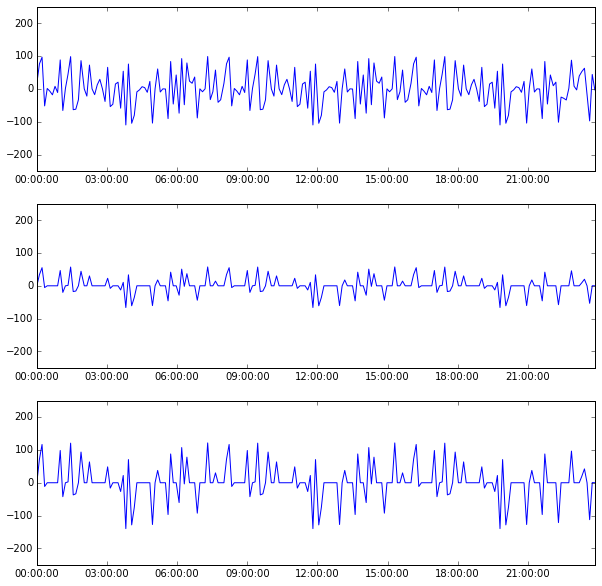

In [39]:


fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax_p_1 = fig.add_subplot(311)
ax_p_2 = fig.add_subplot(312)
ax_p_3 = fig.add_subplot(313)


#ax_f.plot(df_day[0][0:-1:100],f[0:-1:100], 'b-') 

ax_p_1.plot(df_day[0][0:-1:100],p_1[0:-1:100]/1000, 'b-')
ax_p_2.plot(df_day[0][0:-1:100],p_2[0:-1:100]/1000, 'b-')
ax_p_3.plot(df_day[0][0:-1:100],p_3[0:-1:100]/1000, 'b-')

ax_p_1.set_ylim((-250, 250 ))  
ax_p_2.set_ylim((-250, 250 ))  
ax_p_3.set_ylim((-250, 250 )) 


#ax_e.plot(df_day[0][0:-1:100],(e/E)[0:-1:100], 'b-') 
#ax_e.plot(pd.to_timedelta(t_red,unit='s')+df_day[0].values[0],dataIn, 'r-') 

#ax.plot(dfsorted.datetime +  pd.DateOffset(hours=2),dfsorted.out1, 'b-') 
#ax.plot(T, F/F*DeadBandUp,'r-', T, F/F*DeadBandDown,'r-')
#    ax.plot(T, F/F*DeadBandDown, 'r-') 
#ax.legend(('Freq. meas.', 'DeathBand'), 'upper center')
#
#ax.set_xlabel('Time (s)')
#ax.set_ylabel('Frequency (Hz)')
#ax_f.set_xlim((0.0, 10 ))
#ax.set_ylim((59.7, 60.3 ))    
fig.show()


In [40]:
pd.to_timedelta(t_red,unit='s')

<class 'pandas.tseries.tdi.TimedeltaIndex'>
['00:00:00', ..., '23:59:59']
Length: 827, Freq: None

/home/jmmauricio/bin/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


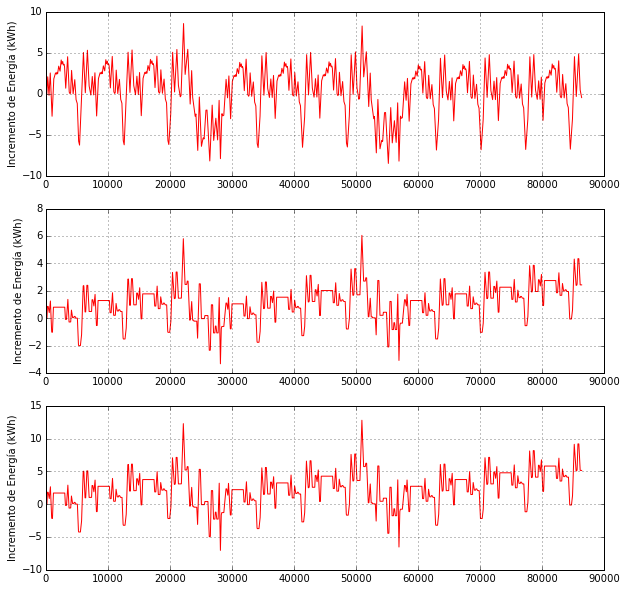

In [41]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)


t_red_1 = reduced_1[:,0]
e_red_1 = reduced_1[:,1]

t_red_2 = reduced_2[:,0]
e_red_2 = reduced_2[:,1]

t_red_3 = reduced_3[:,0]
e_red_3 = reduced_3[:,1]



#t_1 = pd.to_timedelta(t_red,unit='s')+df_day[0].values[0]
#t_2 = pd.to_timedelta(t_red,unit='s')+df_day[0].values[0]
#t_3 = pd.to_timedelta(t_red,unit='s')+df_day[0].values[0]

ax_e_1 = fig.add_subplot(311)
ax_e_2 = fig.add_subplot(312)
ax_e_3 = fig.add_subplot(313)


#ax_f.plot(df_day[0][0:-1:100],f[0:-1:100], 'b-') 

#ax_e_1.plot(df_day[0][0:-1:100],e_1[0:-1:100]/1000, 'b-')
#ax_e_2.plot(df_day[0][0:-1:100],e_2[0:-1:100]/1000, 'b-')
#ax_e_3.plot(df_day[0][0:-1:100],e_3[0:-1:100]/1000, 'b-')

ax_e_1.plot(t_red_1,e_red_1/1.0e3/3600, 'r-')
ax_e_2.plot(t_red_2,e_red_2/1.0e3/3600, 'r-')
ax_e_3.plot(t_red_3,e_red_3/1.0e3/3600, 'r-')
#ax_e_2.plot(df_day[0][0:-1:100],e_2[0:-1:100]/1000, 'b-')
#ax_e_3.plot(df_day[0][0:-1:100],e_3[0:-1:100]/1000, 'b-')


#ax_p_1.set_ylim((-250, 250 ))  
#ax_p_2.set_ylim((-250, 250 ))  
#ax_p_3.set_ylim((-250, 250 )) 


#ax_e.plot(df_day[0][0:-1:100],(e/E)[0:-1:100], 'b-') 
#ax_e.plot(pd.to_timedelta(t_red,unit='s')+df_day[0].values[0],dataIn, 'r-') 

#ax.plot(dfsorted.datetime +  pd.DateOffset(hours=2),dfsorted.out1, 'b-') 
#ax.plot(T, F/F*DeadBandUp,'r-', T, F/F*DeadBandDown,'r-')
#    ax.plot(T, F/F*DeadBandDown, 'r-') 
#ax.legend(('Freq. meas.', 'DeathBand'), 'upper center')
#
#ax.set_xlabel('Time (s)')
ax_e_1.set_ylabel('Incremento de Energía (kWh)')
ax_e_2.set_ylabel('Incremento de Energía (kWh)')
ax_e_3.set_ylabel('Incremento de Energía (kWh)')
#ax_f.set_xlim((0.0, 10 ))
#ax.set_ylim((59.7, 60.3 ))    

ax_e_1.grid(True)
ax_e_2.grid(True)
ax_e_3.grid(True)
fig.show()


TypeError: cannot use a non-absolute DateOffset in datetime/timedelta operations [<DateOffset: kwds={'hours': 0.01}>]

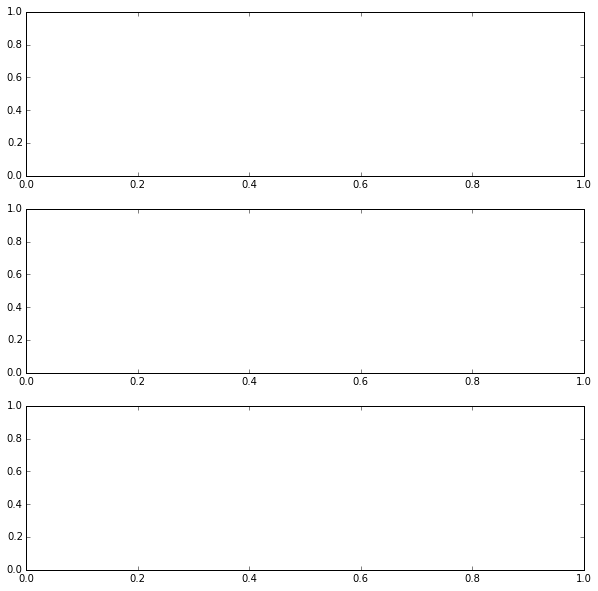

In [42]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)


t_red_1 = reduced_1[:,0]
e_red_1 = reduced_1[:,1]

t_red_2 = reduced_2[:,0]
e_red_2 = reduced_2[:,1]

t_red_3 = reduced_3[:,0]
e_red_3 = reduced_3[:,1]



#t_1 = pd.to_timedelta(t_red,unit='s')+df_day[0].values[0]
#t_2 = pd.to_timedelta(t_red,unit='s')+df_day[0].values[0]
#t_3 = pd.to_timedelta(t_red,unit='s')+df_day[0].values[0]

ax_e_1 = fig.add_subplot(311)
ax_e_2 = fig.add_subplot(312)
ax_e_3 = fig.add_subplot(313)


#ax_f.plot(df_day[0][0:-1:100],f[0:-1:100], 'b-') 

dec = 10
ax_e_1.plot(df_day[0][0:-50:dec]+pd.DateOffset(hours=0.01),e_1[0:-50:dec]/3600/1000, 'b')
ax_e_2.plot(df_day[0][0:-50:dec]+pd.DateOffset(hours=0.01),e_2[0:-50:dec]/3600/1000, 'b')
ax_e_3.plot(df_day[0][0:-50:dec]+pd.DateOffset(hours=0.01),e_3[0:-50:dec]/3600/1000, 'b')

#ax_e_2.plot(df_day[0][0:-1:100],e_2[0:-1:100]/1000, 'b-')
#ax_e_3.plot(df_day[0][0:-1:100],e_3[0:-1:100]/1000, 'b-')


#ax_p_1.set_ylim((-250, 250 ))  
#ax_p_2.set_ylim((-250, 250 ))  
#ax_p_3.set_ylim((-250, 250 )) 


#ax_e.plot(df_day[0][0:-1:100],(e/E)[0:-1:100], 'b-') 
#ax_e.plot(pd.to_timedelta(t_red,unit='s')+df_day[0].values[0],dataIn, 'r-') 

#ax.plot(dfsorted.datetime +  pd.DateOffset(hours=2),dfsorted.out1, 'b-') 
#ax.plot(T, F/F*DeadBandUp,'r-', T, F/F*DeadBandDown,'r-')
#    ax.plot(T, F/F*DeadBandDown, 'r-') 
#ax.legend(('Freq. meas.', 'DeathBand'), 'upper center')
#
#ax.set_xlabel('Time (s)')
#ax.set_ylabel('Frequency (Hz)')
#ax_e_1.set_xlim((0.0, 10 ))
ax_e_1.set_ylim((-15, 15))   
ax_e_2.set_ylim((-15, 15))   
ax_e_3.set_ylim((-15, 15))   
fig.show()

In [ ]:
fig_hist_comparative, (ax_hist) = plt.subplots(nrows=1, figsize=(7,4))  
width = 0.0025
bar_original = ax_hist.bar(res_1[:,0]-2.0*width/2.0,res_1[:,1],width=width, lw=0, color='r',label='Curve 1')
bar_original = ax_hist.bar(res_2[:,0]+0.0*width/2.0,res_2[:,1],width=width, lw=0, color='g',label='Curve 2')
bar_original = ax_hist.bar(res_3[:,0]+2.0*width/2.0,res_3[:,1],width=width, lw=0, color='b',label='Curve 3')
ax_hist.set_xlim((0,0.21))
ax_hist.legend()

#width = 0.025
#ax_high.bar(res[6:,0]-2.0*width/2.0,res[6:,1],width=width, lw=0,  color=colors['red'])
#ax_high.bar(res_red[6:,0]+0.0*width/2.0,res_red[6:,1],width=width, lw=0, color= colors['blue'])
#ax_low.grid(True)
#ax_high.grid(True)

#width = 0.05
#ax_hist.bar(res_red[5:,0]-width/2.0,res_red[5:,1],width=width, lw=0, color= colors['blue'])


In [ ]:
amp_filter_threshold = 0.0001
amplitudes = res_3[:,0]
cycles = res_3[:,1]

idx = np.argmax(amplitudes>=amp_filter_threshold)

print(amplitudes[idx:])
life_consumed = cycles[idx:]/spl_cycles_dod(amplitudes[idx:]*100.0)
total_life_consumed = np.sum(life_consumed)

days = 1.0/total_life_consumed

days/365.0

days

life_consumed

a = np.vstack((amplitudes[idx:].T,cycles[idx:].T,spl_cycles_dod(100*amplitudes[idx:]).T,life_consumed.T*1e3)).T
print(" \\\\\n".join([" & ".join(map('{0:.4g}'.format, line)) for line in a]))

print('&   &    &    {:2.1f}'.format(1000*total_life_consumed))
print('&   & Expectativa:   &    {:2.1f} días'.format(1.0/total_life_consumed))

In [ ]:
np.array([40.0,49.0,50.0,50.0,51.0,60])[0:-1:2]